In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
from sklearn.decomposition import PCA

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 55)

In [4]:
cd ../scripts/

/home/jds98/10 Academy/Week 1/Week-1-Project/scripts


In [5]:
import dataset_infos
import clean_transform as transf
import eda_functions as eda

## Load the data

In [6]:
cd ../data/

/home/jds98/10 Academy/Week 1/Week-1-Project/data


In [7]:
df = pd.read_csv('Week1_challenge_data_source(CSV).csv')

In [8]:
cd ../notebooks/

/home/jds98/10 Academy/Week 1/Week-1-Project/notebooks


In [9]:
df.head()

Bearer Id            Start  Start ms              End  \
0 13,114,483,460,844,900,352.00   4/4/2019 12:01    770.00  4/25/2019 14:35   
1 13,114,483,482,878,900,224.00   4/9/2019 13:04    235.00   4/25/2019 8:15   
2 13,114,483,484,080,500,736.00   4/9/2019 17:42      1.00  4/25/2019 11:58   
3 13,114,483,485,442,799,616.00   4/10/2019 0:31    486.00   4/25/2019 7:36   
4 13,114,483,499,480,700,928.00  4/12/2019 20:10    565.00  4/25/2019 10:40   

   End ms    Dur. (ms)                   IMSI     MSISDN/Number  \
0  662.00 1,823,652.00 208,201,448,079,117.00 33,664,962,239.00   
1  606.00 1,365,104.00 208,201,909,211,140.00 33,681,854,413.00   
2  652.00 1,361,762.00 208,200,314,458,056.00 33,760,627,129.00   
3  171.00 1,321,509.00 208,201,402,342,131.00 33,750,343,200.00   
4  954.00 1,089,009.00 208,201,401,415,120.00 33,699,795,932.00   

                   IMEI     Last Location Name  Avg RTT DL (ms)  \
0 35,521,209,507,511.00  9.16456699548519E+015            42.00   
1 35,794,009,006,359.00                L77566A            65.00   
2 35,281,510,359,387.00                D42335A              NaN   
3 35,356,610,164,913.00                T21824A              NaN   
4 35,407,009,745,539.00                D88865A              NaN   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0             5.00                    23.00                    44.00   
1             5.00                    16.00                    26.00   
2              NaN                     6.00                     9.00   
3              NaN                    44.00                    44.00   
4              NaN                     6.00                     9.00   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0               100.00                            0.00   
1               100.00                            0.00   
2               100.00                            0.00   
3               100.00                            0.00   
4               100.00                            0.00   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                           0.00                0.00               100.00   
1                           0.00                0.00               100.00   
2                           0.00                0.00               100.00   
3                           0.00                0.00               100.00   
4                           0.00                0.00               100.00   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                           0.00                            0.00   
1                           0.00                            0.00   
2                           0.00                            0.00   
3                           0.00                            0.00   
4                           0.00                            0.00   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                  0.00              NaN              NaN   
1                  0.00              NaN              NaN   
2                  0.00              NaN              NaN   
3                  0.00              NaN              NaN   
4                  0.00              NaN              NaN   

   Activity Duration DL (ms)  Activity Duration UL (ms)      Dur. (ms).1  \
0                  37,624.00                  38,787.00 1,823,652,892.00   
1                     168.00                   3,560.00 1,365,104,371.00   
2                       0.00                       0.00 1,361,762,651.00   
3                   3,330.00         

## Data Infos - Missing values identification and others

In [10]:
dataset_infos.data_shape(df)

 There are 150001 rows and 55 columns


In [11]:
dataset_infos.percent_missing(df)

The dataset contains 12.5 % missing values.


In [12]:
dataset_infos.data_types(df)

float64    50
object      5
dtype: int64

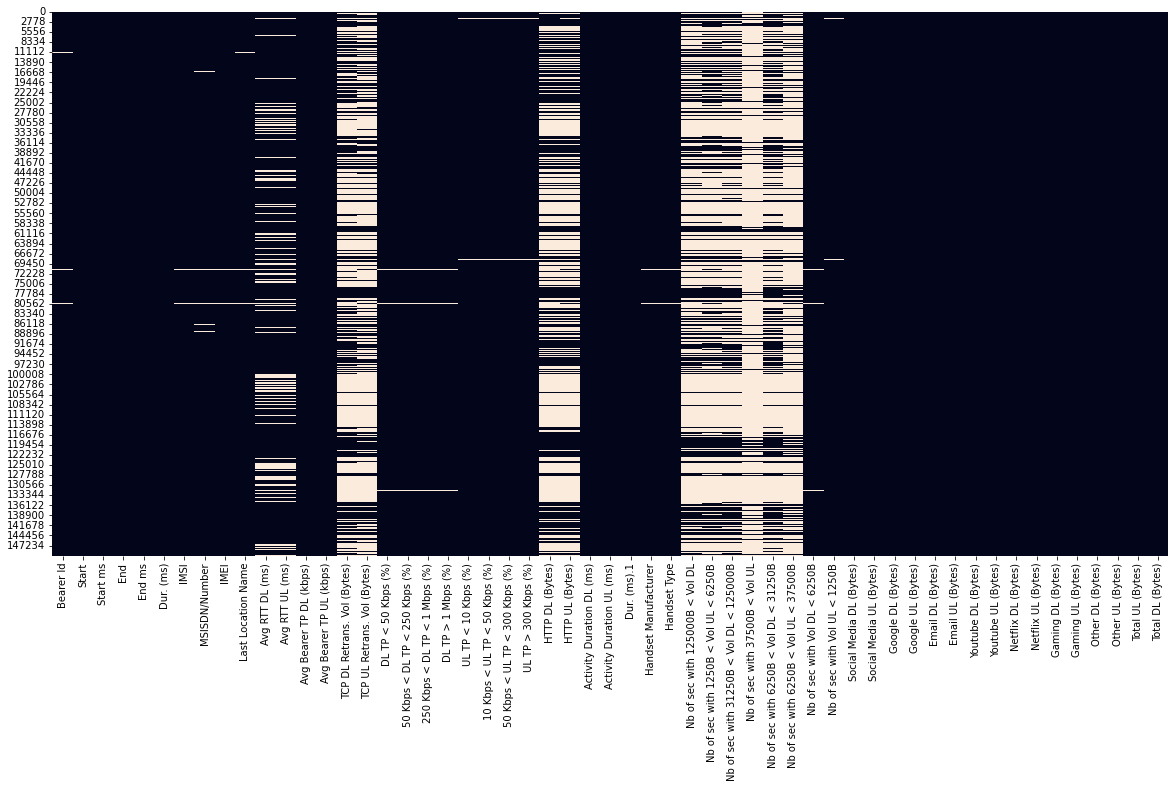

In [13]:
dataset_infos.missing_values_plot(df)

In [14]:
dataset_infos.missing_values_colpercent(df)

Nb of sec with 37500B < Vol UL             0.87
Nb of sec with 6250B < Vol UL < 37500B     0.75
Nb of sec with 125000B < Vol DL            0.65
TCP UL Retrans. Vol (Bytes)                0.64
Nb of sec with 31250B < Vol DL < 125000B   0.62
Nb of sec with 1250B < Vol UL < 6250B      0.62
Nb of sec with 6250B < Vol DL < 31250B     0.59
TCP DL Retrans. Vol (Bytes)                0.59
HTTP UL (Bytes)                            0.55
HTTP DL (Bytes)                            0.54
Avg RTT DL (ms)                            0.19
Avg RTT UL (ms)                            0.19
Last Location Name                         0.01
MSISDN/Number                              0.01
Bearer Id                                  0.01
Nb of sec with Vol UL < 1250B              0.01
10 Kbps < UL TP < 50 Kbps (%)              0.01
UL TP > 300 Kbps (%)                       0.01
50 Kbps < UL TP < 300 Kbps (%)             0.01
UL TP < 10 Kbps (%)                        0.01
Nb of sec with Vol DL < 6250B           

In [15]:
df.select_dtypes('object').columns

Index(['Start', 'End', 'Last Location Name', 'Handset Manufacturer',
       'Handset Type'],
      dtype='object')

In [16]:
cd ../notebooks/Figures/

/home/jds98/10 Academy/Week 1/Week-1-Project/notebooks/Figures


## Startind EDA

## Top 5 handsets and top 3 handsets manufactures

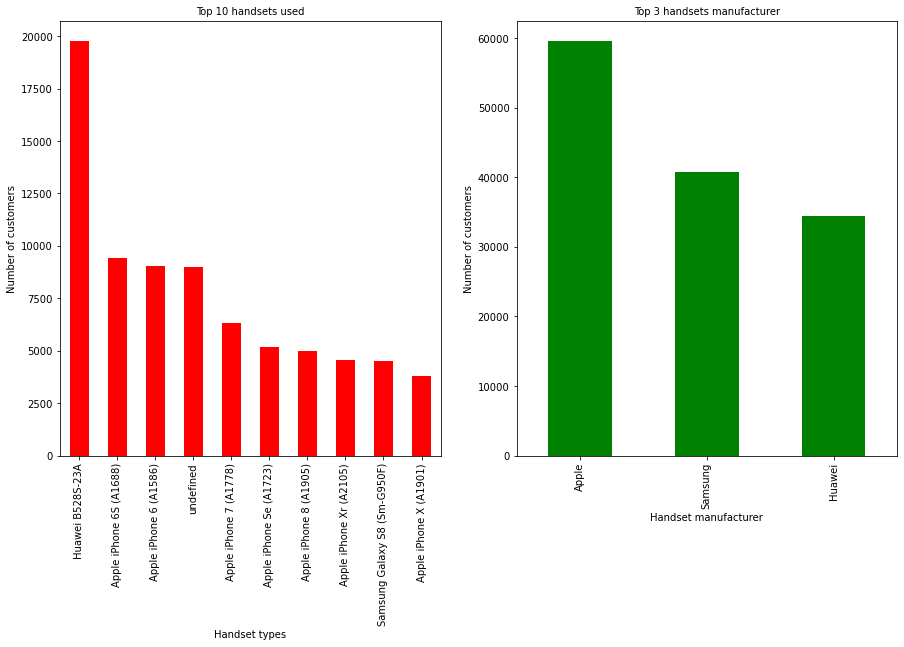

In [17]:
handsets = df['Handset Type'].value_counts()
handsets_man = df['Handset Manufacturer'].value_counts()


fig, ax = plt.subplots(1,2, figsize=(15, 8))
ax[0].tick_params(axis='x', labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)
ax[0].set_xlabel('Handset types', fontsize=10)
ax[0].set_ylabel('Number of customers' , fontsize=10)
ax[0].set_title('Top 10 handsets used', fontsize=10)
handsets[:10].plot(ax=ax[0], kind='bar', color='red')

ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)
ax[1].set_xlabel('Handset manufacturer', fontsize=10)
ax[1].set_ylabel('Number of customers' , fontsize=10)
ax[1].set_title('Top 3 handsets manufacturer', fontsize=10)
handsets_man[:3].plot(ax=ax[1], kind='bar', color='green')
plt.savefig('Top 10 handsets and top 3 handsets manufacturer.png')

In [19]:
handsets[:10].index

Index(['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)',
       'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)',
       'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)',
       'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)'],
      dtype='object')

## Top 5 handsets per top 3 handsets manufacturer

In [18]:
handsets_man1 = df[df['Handset Manufacturer'] == 'Apple']['Handset Type'].value_counts()
handsets_man2 = df[df['Handset Manufacturer'] == 'Samsung']['Handset Type'].value_counts()
handsets_man3 = df[df['Handset Manufacturer'] == 'Huawei']['Handset Type'].value_counts()

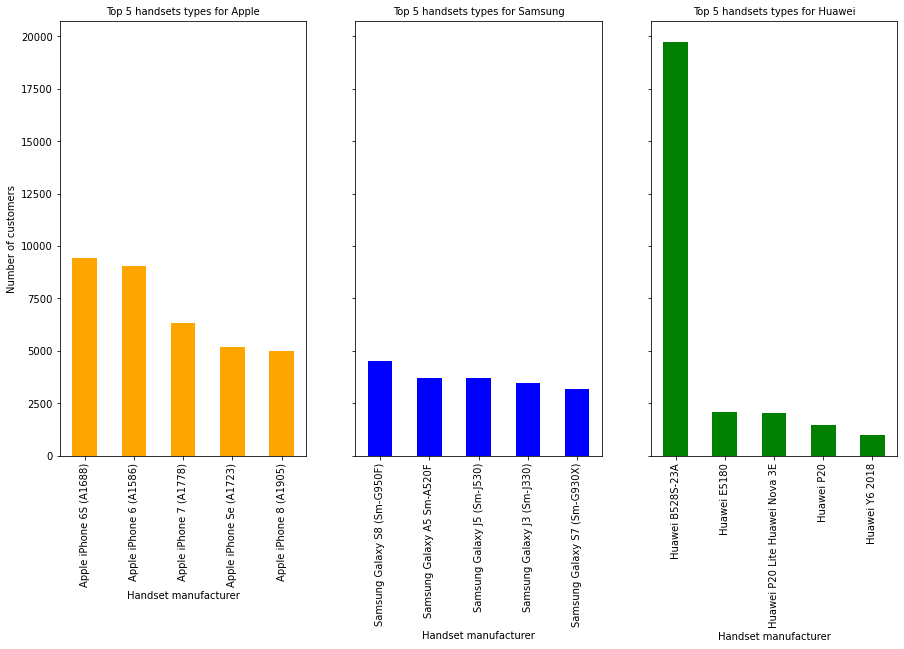

In [19]:
fig, ax = plt.subplots(1,3, figsize=(15, 8), sharey=True)
ax[0].tick_params(axis='x', labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)
ax[0].set_xlabel('Handset manufacturer', fontsize=10)
ax[0].set_ylabel('Number of customers' , fontsize=10)
ax[0].set_title('Top 5 handsets types for Apple', fontsize=10)
handsets_man1[:5].plot(ax=ax[0], kind='bar', color='orange')

ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)
ax[1].set_xlabel('Handset manufacturer', fontsize=10)
ax[1].set_ylabel('Number of customers' , fontsize=10)
ax[1].set_title('Top 5 handsets types for Samsung', fontsize=10)
handsets_man2[:5].plot(ax=ax[1], kind='bar', color='blue')

ax[2].tick_params(axis='x', labelsize=10)
ax[2].tick_params(axis='y', labelsize=10)
ax[2].set_xlabel('Handset manufacturer', fontsize=10)
ax[2].set_ylabel('Number of customers' , fontsize=10)
ax[2].set_title('Top 5 handsets types for Huawei', fontsize=10)
handsets_man3[:5].plot(ax=ax[2], kind='bar', color='green')

plt.savefig('Top 5 handsets per top 3 handsets_manufacturer.png')

## Cleaning & Deeling with missing values

In [20]:
eda.missing_values_table(df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254              86.80   
Nb of sec with 6250B < Vol UL < 37500B            111843              74.60   
Nb of sec with 125000B < Vol DL                    97538              65.00   
TCP UL Retrans. Vol (Bytes)                        96649              64.40   
Nb of sec with 31250B < Vol DL < 125000B           93586              62.40   
Nb of sec with 1250B < Vol UL < 6250B              92894              61.90   
Nb of sec with 6250B < Vol DL < 31250B             88317              58.90   
TCP DL Retrans. Vol (Bytes)                        88146              58.80   
HTTP UL (Bytes)                                    81810              54.50   
HTTP DL (Bytes)                                    81474              54.30   
Avg RTT DL (ms)                                    27829              18.60   
Avg RTT UL (ms)                                    27812              18.50   
Last Location Name                                  1153               0.80   
MSISDN/Number                                       1066               0.70   
Bearer Id                                            991               0.70   
Nb of sec with Vol UL < 1250B                        793               0.50   
10 Kbps < UL TP < 50 Kbps (%)                        792               0.50   
UL TP > 300 Kbps (%)                                 792               0.50   
50 Kbps < UL TP < 300 Kbps (%)                       792               0.50   
UL TP < 10 Kbps (%)                                  792               0.50   
Nb of sec with Vol DL < 6250B                        755               0.50   
250 Kbps < DL TP < 1 Mbps (%)                        754               0.50   
50 Kbps < DL TP < 250 Kbps (%)                       754               0.50   
DL TP < 50 Kbps (%)                                  754               0.50   
DL TP > 1 Mbps (%)                                   754               0.50   
Handset Type                                         572               0.40   
Handset Manufacturer                                 572               0.40   
IMEI                                                 572               0.40   
IMSI                                                 570               0.40   
Dur. (ms)                                              1               0.00   
Total UL (Bytes)                                       1               0.00   
Start ms                                               1               0.00   
End                                                    1               0.00   
End ms                                                 1               0.00   
Start                                                  1               0.00   
Avg Bearer TP DL (kbps)                                1               0.00   
Dur. (ms).1                                            1               0.00   
Activity Duration UL (ms)                              1               0.00   
Activity Duration DL (ms)                              1               0.00   
Avg Bearer TP UL (kbps)                                1               0.00   
Total DL (Bytes)                                       1               0.00   

                                            Dtype  
Nb of sec with 37500B < Vol UL            float64  
Nb of sec with 6250B < Vol UL < 37500B    float64  
Nb of sec with 125000B < Vol DL           float64  
TCP UL Retrans. Vol (Bytes)               float64  
Nb of sec with 31250B < Vol DL < 125000B  float64  
Nb of sec with 1250B < Vol UL < 6250B     float64  
Nb of sec with 6250B < Vol DL < 31250B    float64  
TCP DL Retrans. Vol (Bytes)               float64  
HTTP UL (Bytes)                           float64  
HTTP DL (Bytes)                           float64  
Avg RTT DL (ms)                           float64  
Avg RTT UL (ms)                           float64  
Last Location Name                         obje

In [21]:
## Drop columns with more that 30% missing values: they are not interesting
df = transf.drop_columns_with_much_na(df)

In [22]:
for col in ['Start', 'End']:
    df = transf.convert_to_datetime(df, col)


In [23]:
for col in df.select_dtypes('object').columns:
    df = transf.fill_missing_non_numeric(df, col)

In [24]:
df = df.dropna(subset=['Bearer Id'])

In [25]:
for col in df.select_dtypes('float').columns:
    df = transf.fill_missing_numeric(df, col)

In [26]:
dataset_infos.data_shape(df)

 There are 149010 rows and 45 columns


In [27]:
dataset_infos.percent_missing(df)

The dataset contains 0.0 % missing values.


## Data Aggregation - Users behaviour on the applications

In [28]:
db_behav = df.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'Dur. (ms)': 'sum','Total DL (Bytes)': 'sum',
                    'Total UL (Bytes)': 'sum', 'Social Media DL (Bytes)': 'sum',
                    'Social Media UL (Bytes)': 'sum', 'Google DL (Bytes)': 'sum', 'Google UL (Bytes)': 'sum',
                    'Email DL (Bytes)': 'sum', 'Email UL (Bytes)': 'sum', 'Youtube DL (Bytes)': 'sum',
                    'Youtube UL (Bytes)': 'sum', 'Netflix DL (Bytes)': 'sum', 'Netflix UL (Bytes)': 'sum',
                    'Gaming DL (Bytes)': 'sum', 'Gaming UL (Bytes)': 'sum', 'Other DL (Bytes)': 'sum',
                    'Other UL (Bytes)': 'sum'}).reset_index()

db_behav.rename(columns = {'Bearer Id':'number of xDR sessions'}, inplace = True)

In [29]:
db_behav

MSISDN/Number  number of xDR sessions     Dur. (ms)  \
0           33,601,001,722.00                       1    116,720.00   
1           33,601,001,754.00                       1    181,230.00   
2           33,601,002,511.00                       1    134,969.00   
3           33,601,007,832.00                       1     49,878.00   
4           33,601,008,617.00                       2     37,104.00   
...                       ...                     ...           ...   
106467      33,789,997,247.00                       1    140,988.00   
106468      41,906,541,782.21                     504 35,399,200.00   
106469   3,197,020,876,596.00                       1    877,385.00   
106470 337,000,037,000,919.00                       1    253,030.00   
106471 882,397,108,489,451.00                       1    869,844.00   

         Total DL (Bytes)  Total UL (Bytes)  Social Media DL (Bytes)  \
0          842,637,466.00     36,053,108.00             2,206,504.00   
1          120,755,184.00     36,104,459.00             2,598,548.00   
2          556,659,663.00     39,306,820.00             3,148,004.00   
3          401,993,172.00     20,327,526.00               251,469.00   
4        1,363,130,417.00     94,280,527.00             2,861,230.00   
...                   ...               ...                      ...   
106467     444,575,092.00     35,732,243.00               442,214.00   
106468 232,876,890,010.00 21,175,512,458.00           915,265,249.00   
106469     194,828,056.00     37,295,915.00               668,596.00   
106470     539,634,985.00     56,652,839.00               496,337.00   
106471      78,697,597.00     60,456,049.00             1,500,145.00   

        Social Media UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
0                     25,631.00       3,337,123.00       1,051,882.00   
1                     62,017.00       4,197,697.00       1,137,166.00   
2                     47,619.00       3,343,483.00          99,643.00   
3                     28,825.00       5,937,765.00       3,740,728.00   
4                     51,312.00      13,728,668.00       4,770,948.00   
...                         ...                ...                ...   
106467                56,355.00       1,472,406.00       3,957,299.00   
106468            17,157,558.00   2,852,653,781.00   1,072,705,573.00   
106469                46,628.00       8,572,779.00       1,865,881.00   
106470                25,229.00       8,215,537.00       1,615,080.00   
106471                45,943.00       5,985,089.00       3,233,558.00   

        Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  \
0             837,400.00        493,962.00       14,900,201.00   
1           2,828,821.00        478,960.00        5,324,251.00   
2           2,436,500.00        768,880.00        2,137,272.00   
3           2,178,618.00        106,052.00        4,393,123.00   
4           2,247,808.00      1,057,661.00       10,339,971.00   
...                  ...               ...                 ...   
106467      2,513,433.00            664.00        5,596,862.00   
106468    878,854,637.00    237,945,753.00    5,729,303,280.00   
106469        842,279.00        678,492.00        9,839,889.00   
106470      2,989,663.00        328,919.00       16,690,728.00   
106471      2,518,425.00        812,549.00       18,980,320.00   

        Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0             6,724,347.00       10,265,105.00       16,915,876.00   
1             7,107,972.00          770,569.00       10,451,194.00   
2            19,196,298.00       16,525,919.00        2,827,981.00   
3             2,584,198.00        1,157,362.00          784,730.00   
4            31,193,031.00       24,971,647.00       24,230,077.00   
...                    ...                 ...                 ...   
106467       14,254,710.00        6,929,961.00        1,601,099.00   
106468    5,718,351,114.00    5,666,468,028.00    5,666,176,182.00  

In [30]:
db_behav.columns

Index(['MSISDN/Number', 'number of xDR sessions', 'Dur. (ms)',
       'Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)'],
      dtype='object')

In [31]:
db_behav['Social Media Total (Bytes)'] = db_behav['Social Media DL (Bytes)'] + db_behav['Social Media UL (Bytes)']
db_behav['Google Total (Bytes)'] = db_behav['Google DL (Bytes)'] + db_behav['Google UL (Bytes)']
db_behav['Email Total (Bytes)'] = db_behav['Email DL (Bytes)'] + db_behav['Email UL (Bytes)']
db_behav['Youtube Total (Bytes)'] = db_behav['Youtube DL (Bytes)'] + db_behav['Youtube UL (Bytes)']
db_behav['Netflix Total (Bytes)'] = db_behav['Netflix DL (Bytes)'] + db_behav['Netflix UL (Bytes)']
db_behav['Gaming Total (Bytes)'] = db_behav['Gaming DL (Bytes)'] + db_behav['Gaming UL (Bytes)']
db_behav['Other Total (Bytes)'] = db_behav['Other DL (Bytes)'] + db_behav['Other UL (Bytes)']


In [32]:
db_behav = db_behav.drop(['Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)'], axis=1)

In [33]:
db_behav

MSISDN/Number  number of xDR sessions     Dur. (ms)  \
0           33,601,001,722.00                       1    116,720.00   
1           33,601,001,754.00                       1    181,230.00   
2           33,601,002,511.00                       1    134,969.00   
3           33,601,007,832.00                       1     49,878.00   
4           33,601,008,617.00                       2     37,104.00   
...                       ...                     ...           ...   
106467      33,789,997,247.00                       1    140,988.00   
106468      41,906,541,782.21                     504 35,399,200.00   
106469   3,197,020,876,596.00                       1    877,385.00   
106470 337,000,037,000,919.00                       1    253,030.00   
106471 882,397,108,489,451.00                       1    869,844.00   

         Total DL (Bytes)  Total UL (Bytes)  Social Media Total (Bytes)  \
0          842,637,466.00     36,053,108.00                2,232,135.00   
1          120,755,184.00     36,104,459.00                2,660,565.00   
2          556,659,663.00     39,306,820.00                3,195,623.00   
3          401,993,172.00     20,327,526.00                  280,294.00   
4        1,363,130,417.00     94,280,527.00                2,912,542.00   
...                   ...               ...                         ...   
106467     444,575,092.00     35,732,243.00                  498,569.00   
106468 232,876,890,010.00 21,175,512,458.00              932,422,807.00   
106469     194,828,056.00     37,295,915.00                  715,224.00   
106470     539,634,985.00     56,652,839.00                  521,566.00   
106471      78,697,597.00     60,456,049.00                1,546,088.00   

        Google Total (Bytes)  Email Total (Bytes)  Youtube Total (Bytes)  \
0               4,389,005.00         1,331,362.00          21,624,548.00   
1               5,334,863.00         3,307,781.00          12,432,223.00   
2               3,443,126.00         3,205,380.00          21,333,570.00   
3               9,678,493.00         2,284,670.00           6,977,321.00   
4              18,499,616.00         3,305,469.00          41,533,002.00   
...                      ...                  ...                    ...   
106467          5,429,705.00         2,514,097.00          19,851,572.00   
106468      3,925,359,354.00     1,116,800,390.00      11,447,654,394.00   
106469         10,438,660.00         1,520,771.00          11,959,905.00   
106470          9,830,617.00         3,318,582.00          36,734,940.00   
106471          9,218,647.00         3,330,974.00          40,940,710.00   

        Netflix Total (Bytes)  Gaming Total (Bytes)  Other Total (Bytes)  
0               27,180,981.00        812,458,661.00       386,570,872.00  
1               11,221,763.00        119,750,078.00       281,710,071.00  
2               19,353,900.00        538,827,713.00       501,693,672.00  
3                1,942,092.00        391,126,127.00        35,279,702.00  
4               49,201,724.00      1,314,797,820.00       804,804,484.00  
...                       ...                   ...                  ...  
106467           8,531,060.00        437,003,292.00       211,115,113.00  
106468      11,332,644,210.00    221,065,748,503.00   215,011,972,057.00  
106469          26,592,300.00        178,048,738.00       470,526,473.00  
106470          30,905,042.00        510,142,695.00       149,188,439.00  
106471          28,846,230.00         43,070,260.00       401,360,457.00  

[106472 rows x 12 columns]

### Outliers identification in db_behav and dealing with them

In [34]:
db_behav = db_behav.drop(['MSISDN/Number'], axis=1)

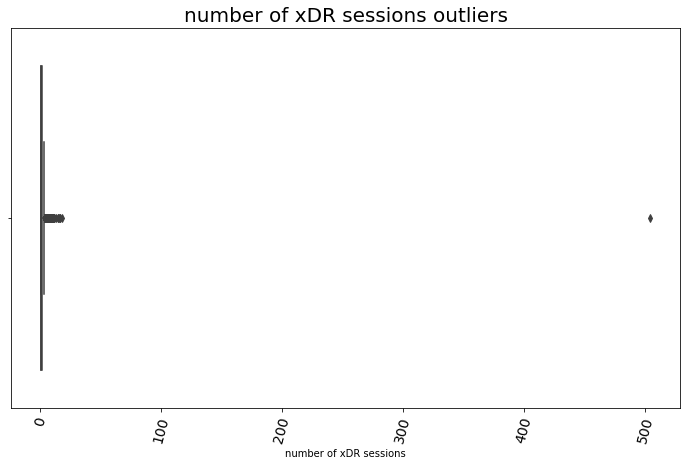

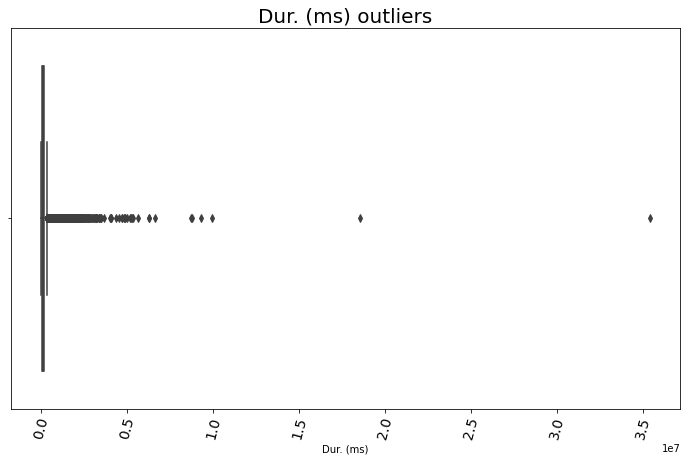

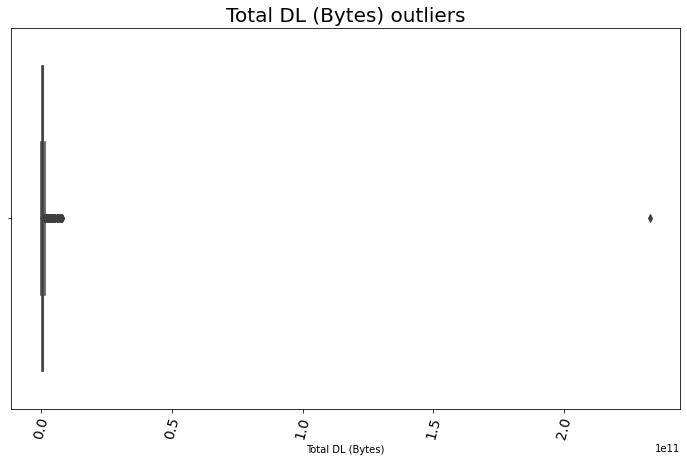

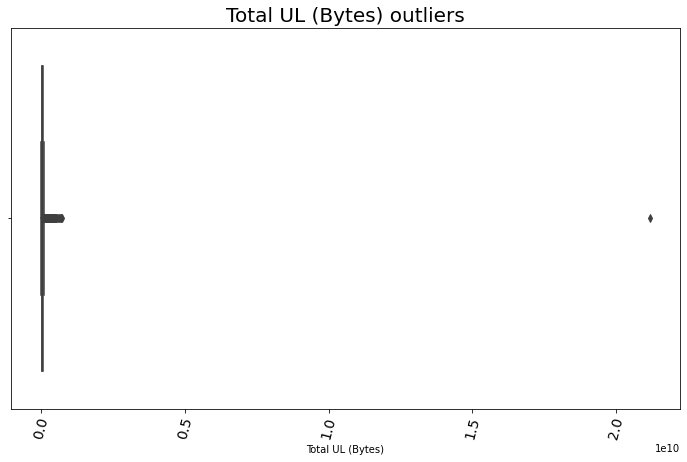

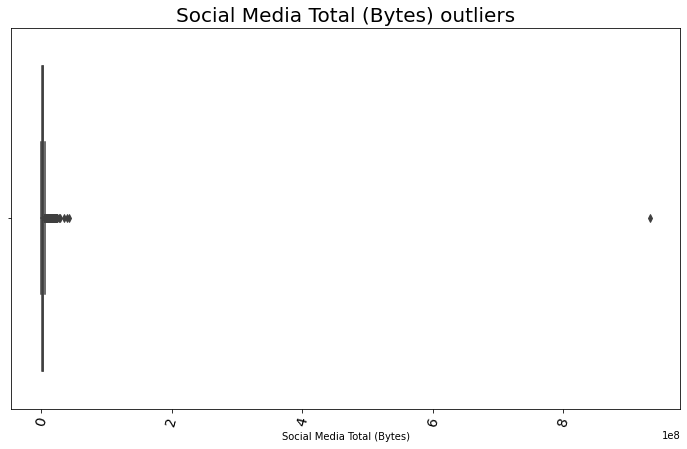

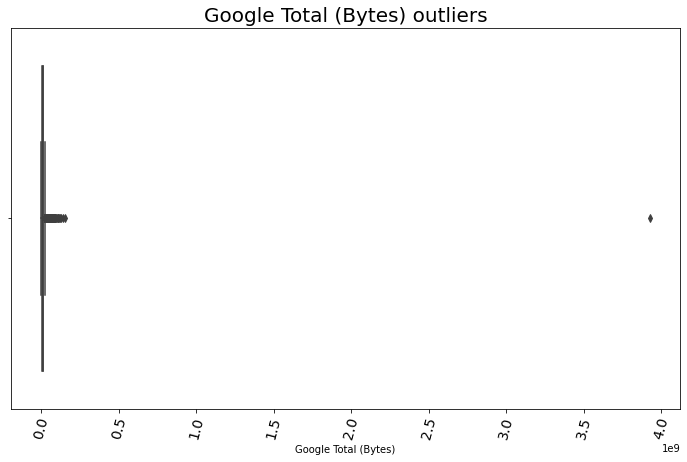

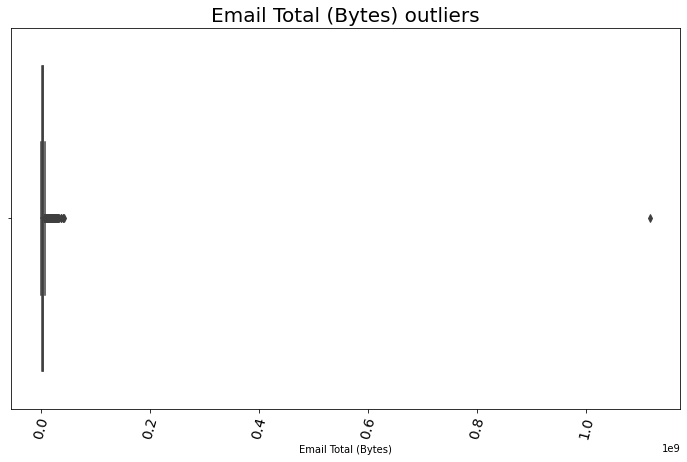

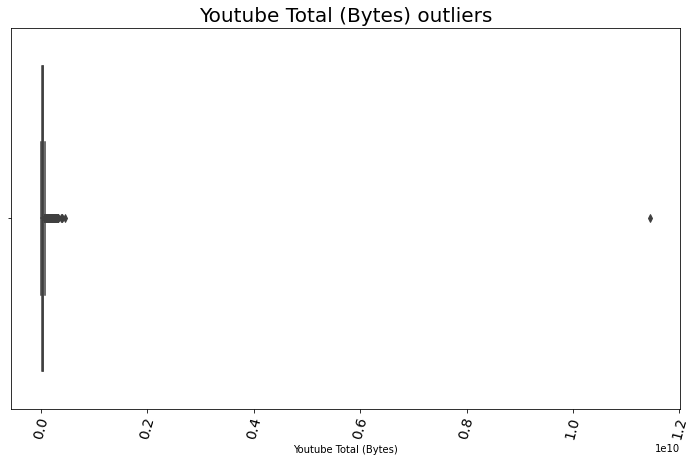

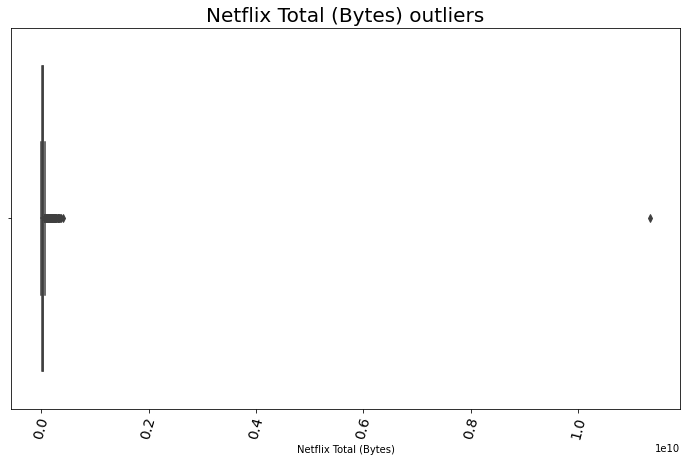

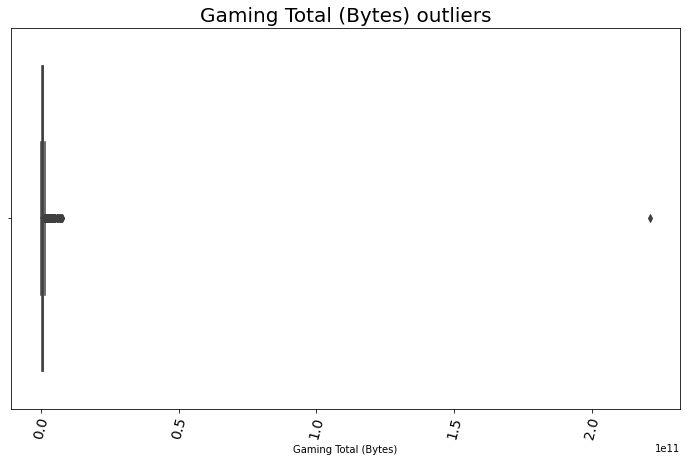

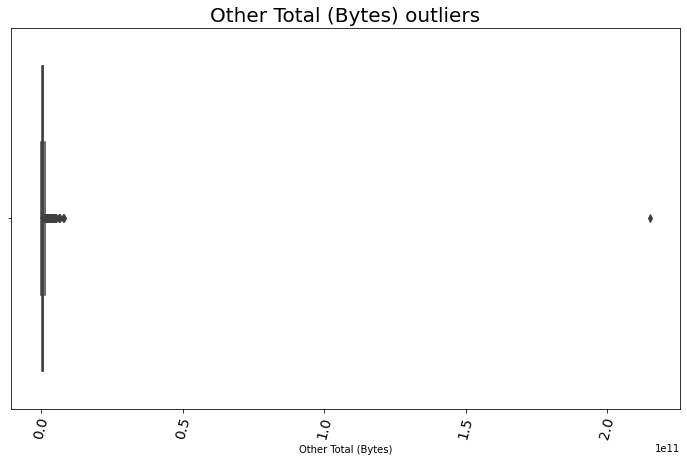

In [35]:
#### Boxplot to visualize the ouliers
for col in db_behav.columns:
    eda.plot_box(db_behav, col, f'{col} outliers')

In [36]:
### Get the outliers for future look
outlier_dict = {}
for col in db_behav.columns:
    outlier_dict[f'{col}_outlier'] = dataset_infos.get_outliers(db_behav, col)

In [37]:
### Fix the outliers by replacing them by their median values
for col in db_behav.columns:
    db_behav[col] = eda.fix_outlier(db_behav, col, 0.90)

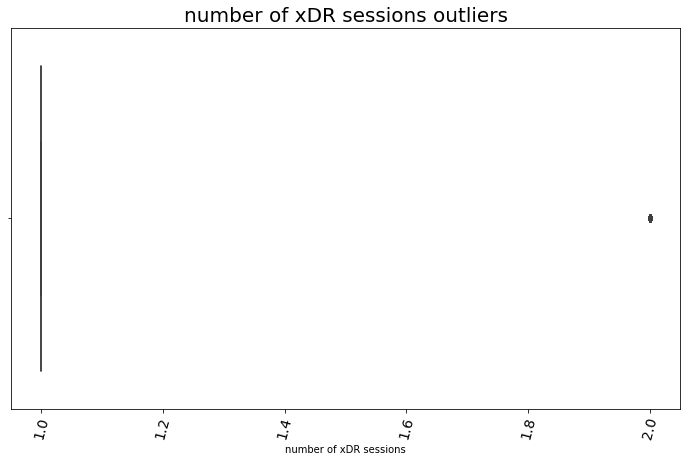

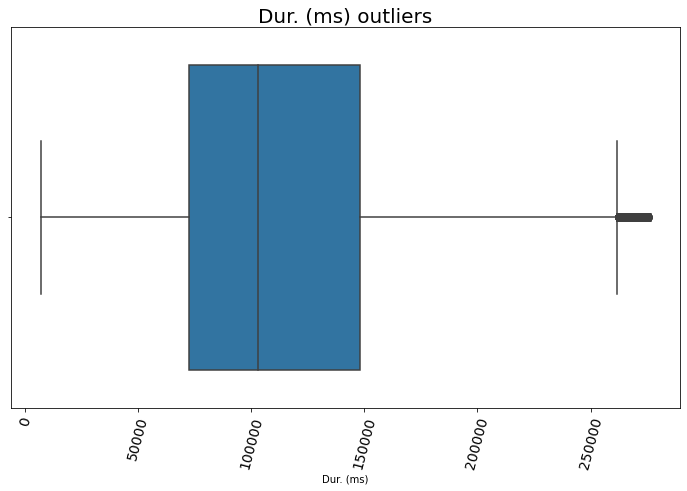

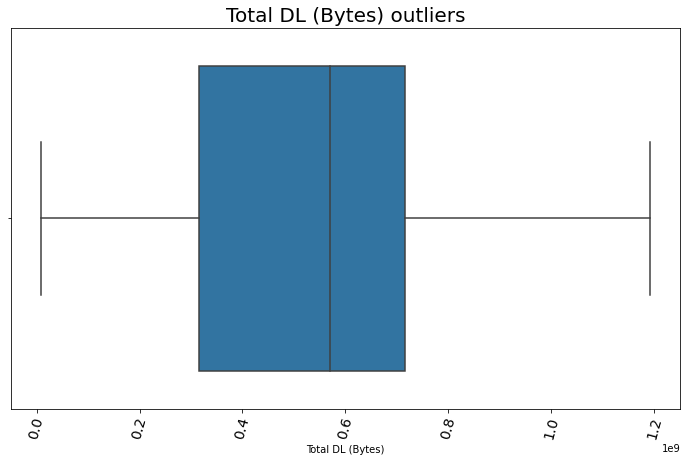

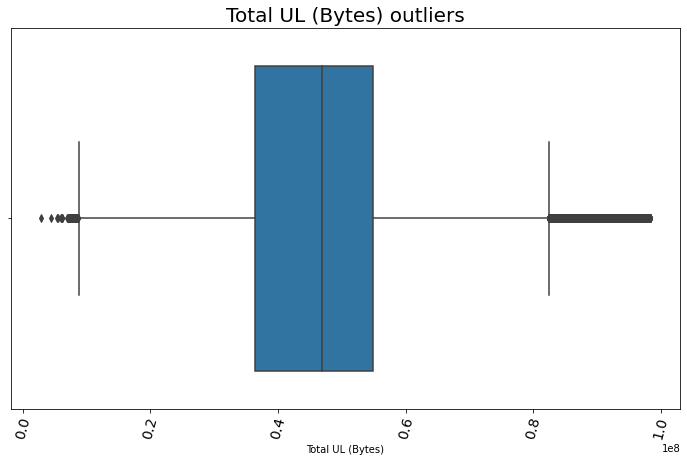

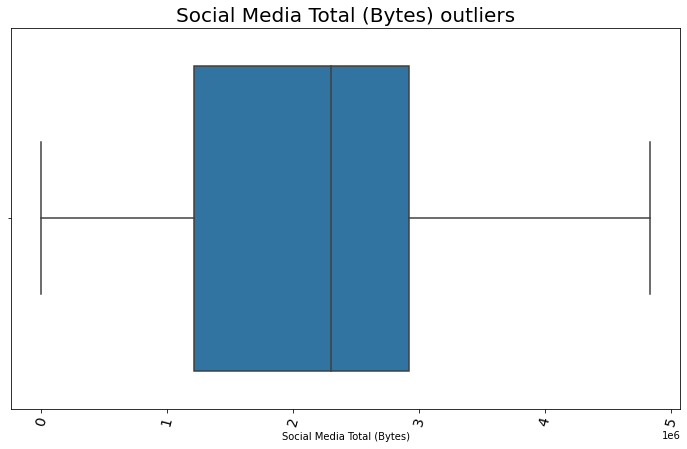

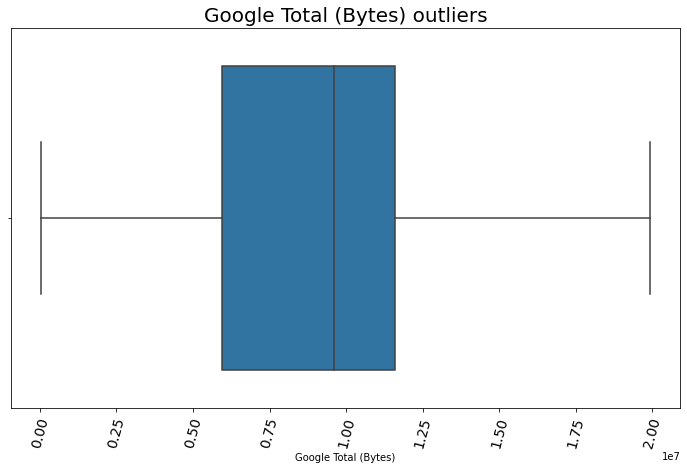

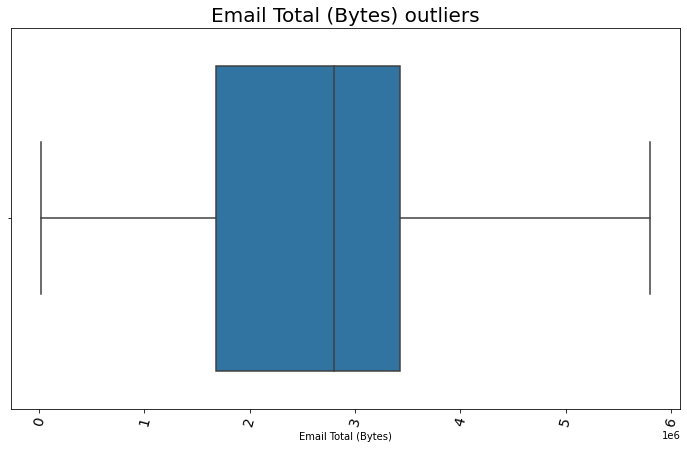

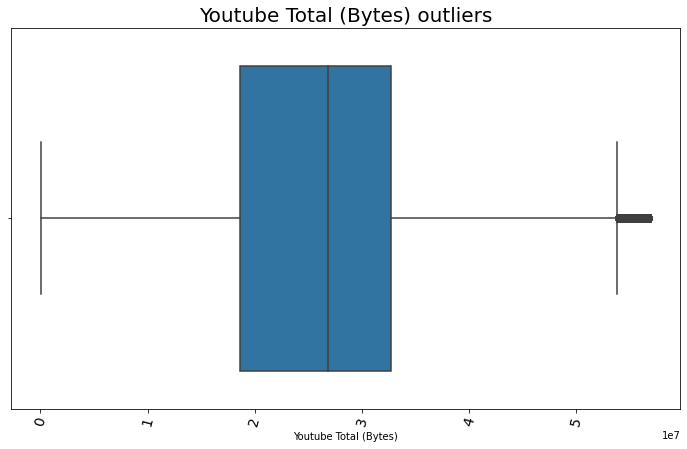

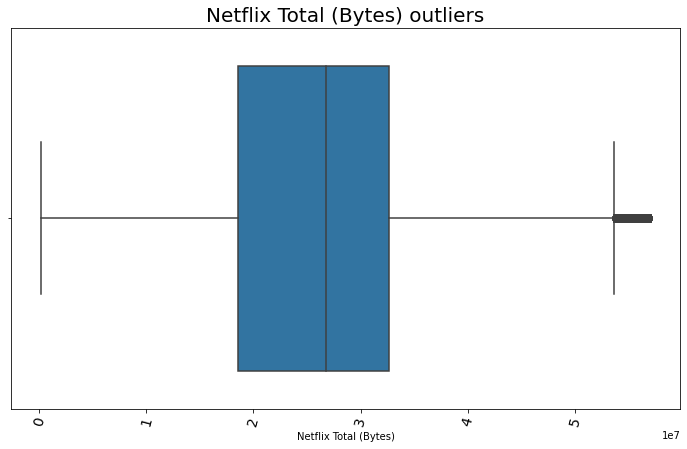

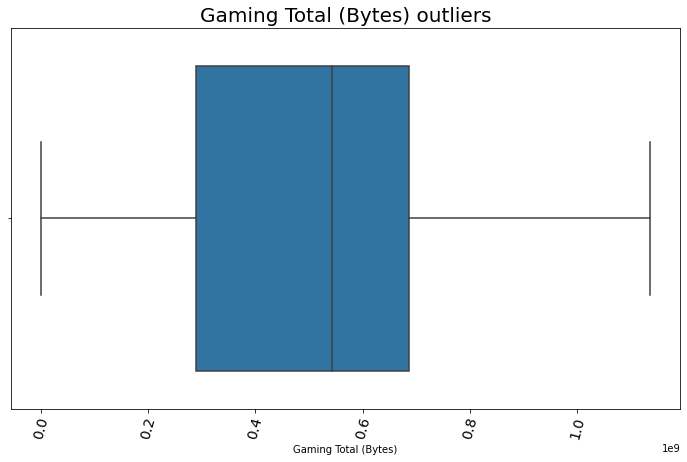

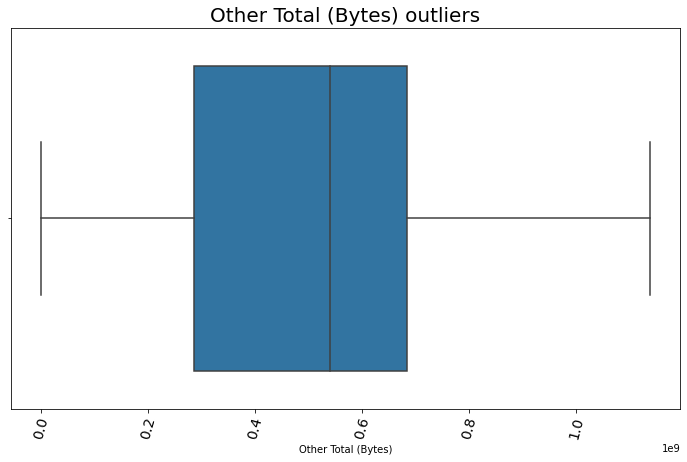

In [38]:
#### Boxplot to visualize the ouliers
for col in db_behav.columns:
    eda.plot_box(db_behav, col, f'{col} outliers')

Some of the outliers are not fixed but they won't have anymore much influence on the results. Then we can go ahead cause they are much better than previously.

   ### Exploratory Data Analysis on db_behav

### Basic metrics analysis (mean, median, etc) in the Dataset

In [39]:
db_behav.describe()

number of xDR sessions  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
count              106,472.00 106,472.00        106,472.00        106,472.00   
mean                     1.20 109,025.89    524,549,056.37     48,080,487.18   
std                      0.40  60,946.79    265,126,173.91     17,615,869.01   
min                      1.00   7,142.00      8,827,082.00      2,866,892.00   
25%                      1.00  72,400.25    314,989,571.50     36,402,013.75   
50%                      1.00 103,137.25    570,732,888.50     46,813,133.75   
75%                      1.00 148,074.75    714,995,830.75     54,823,385.50   
max                      2.00 276,181.00  1,191,379,877.00     98,270,864.00   

       Social Media Total (Bytes)  Google Total (Bytes)  Email Total (Bytes)  \
count                  106,472.00            106,472.00           106,472.00   
mean                 2,104,387.47          9,060,788.40         2,617,424.70   
std                  1,110,744.55          4,108,656.56         1,220,532.61   
min                      1,563.00             40,330.00            18,176.00   
25%                  1,211,944.00          5,945,678.25         1,675,399.00   
50%                  2,305,229.75          9,592,621.50         2,801,140.50   
75%                  2,920,335.00         11,592,589.25         3,422,654.50   
max                  4,833,713.00         19,914,434.00         5,800,723.00   

       Youtube Total (Bytes)  Netflix Total (Bytes)  Gaming Total (Bytes)  \
count             106,472.00             106,472.00            106,472.00   
mean           26,276,081.83          26,251,997.90        495,210,632.00   
std            11,299,880.77          11,358,722.97        260,249,585.14   
min                78,903.00             184,569.00            306,358.00   
25%            18,637,068.25          18,570,117.00        288,256,023.00   
50%            26,816,367.25          26,731,179.50        542,684,861.50   
75%            32,693,303.00          32,603,751.25        686,173,294.00   
max            56,853,056.00          56,988,319.00      1,135,720,381.00   

       Other Total (Bytes)  
count           106,472.00  
mean        493,520,327.32  
std         260,287,284.11  
min             149,045.00  
25%         285,875,437.50  
50%         540,114,642.50  
75%         683,274,368.00  
max       1,137,735,549.00

In [40]:
db_behav.skew()

number of xDR sessions       1.49
Dur. (ms)                    0.61
Total DL (Bytes)             0.08
Total UL (Bytes)             0.87
Social Media Total (Bytes)   0.05
Google Total (Bytes)         0.25
Email Total (Bytes)          0.19
Youtube Total (Bytes)        0.37
Netflix Total (Bytes)        0.40
Gaming Total (Bytes)         0.04
Other Total (Bytes)          0.06
dtype: float64

### Graphical Univariate Analysis 

In [41]:
from matplotlib.pyplot import cm
color = cm.rainbow(np.linspace(0, 1, 10))

columns = ['Dur. (ms)', 'Total DL (Bytes)',
       'Total UL (Bytes)', 'Social Media Total (Bytes)',
       'Google Total (Bytes)', 'Email Total (Bytes)', 'Youtube Total (Bytes)',
       'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)']

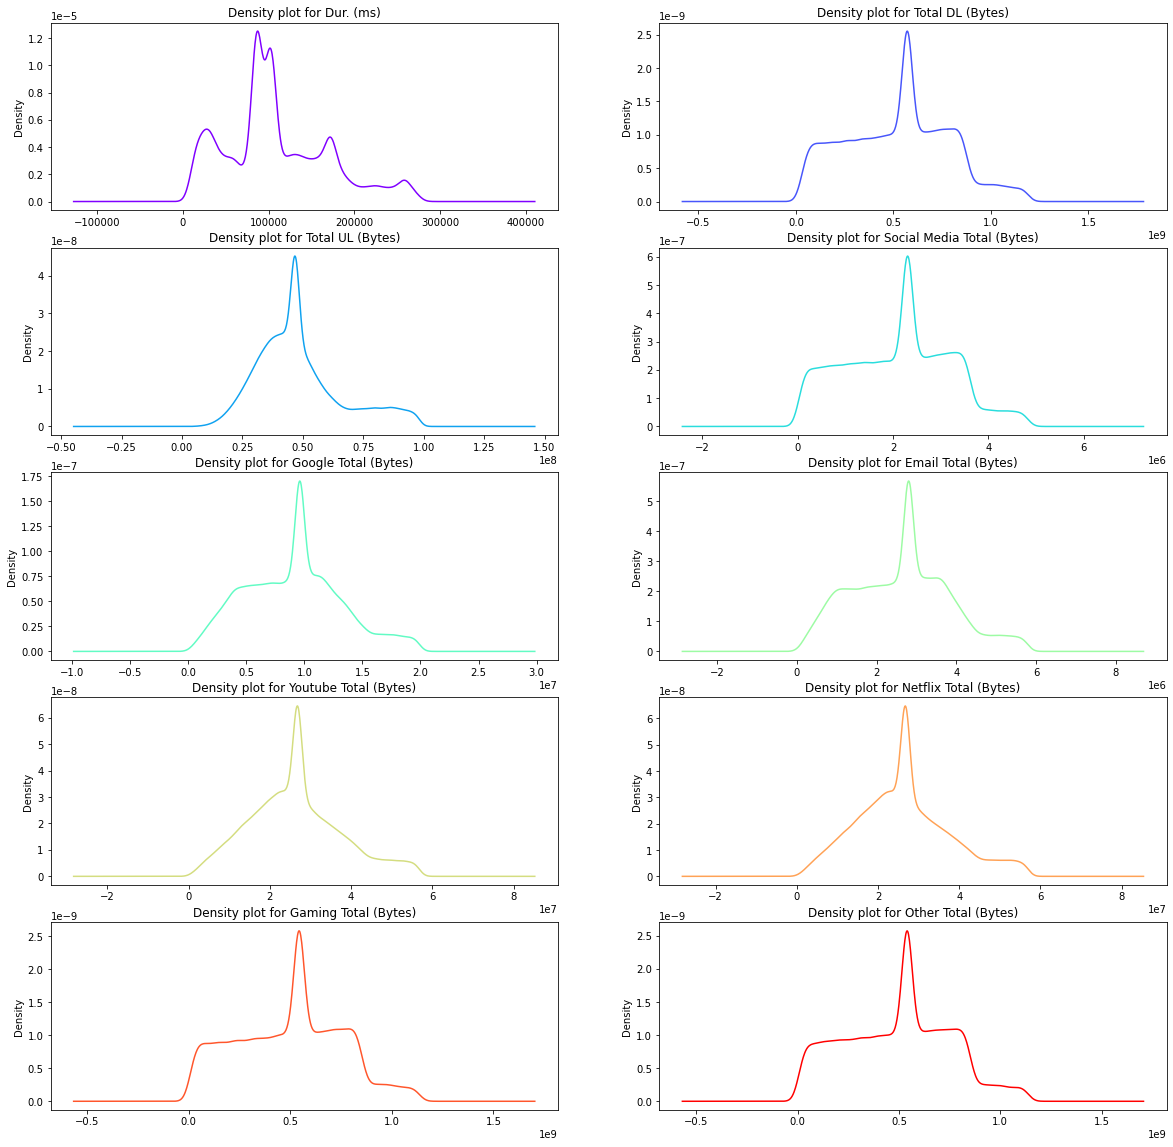

In [42]:
plt.figure(figsize=(20, 20))
for i in range(len(columns)):
    plt.subplot(5, 2, i + 1)
    db_behav[columns[i]].plot.density(color = color[i])
    plt.title(f'Density plot for {columns[i]}')
plt.savefig('Density plots_UOA.png')

### Bivariate Analysis – Relationship between each application & the total DL+UL

In [43]:
db_behav['Total DL+UL'] = db_behav['Total DL (Bytes)'] + db_behav['Total UL (Bytes)']

In [44]:
dbb_behav = db_behav.copy()

In [45]:
dbb_behav = dbb_behav.drop(['Total DL (Bytes)', 'Total UL (Bytes)'], axis = 1)

In [46]:
dbb_behav

number of xDR sessions  Dur. (ms)  Social Media Total (Bytes)  \
0                         1.00 116,720.00                2,232,135.00   
1                         1.00 181,230.00                2,660,565.00   
2                         1.00 134,969.00                3,195,623.00   
3                         1.00  49,878.00                  280,294.00   
4                         2.00  37,104.00                2,912,542.00   
...                        ...        ...                         ...   
106467                    1.00 140,988.00                  498,569.00   
106468                    1.00 103,137.50                2,305,230.50   
106469                    1.00 103,137.50                  715,224.00   
106470                    1.00 253,030.00                  521,566.00   
106471                    1.00 103,137.50                1,546,088.00   

        Google Total (Bytes)  Email Total (Bytes)  Youtube Total (Bytes)  \
0               4,389,005.00         1,331,362.00          21,624,548.00   
1               5,334,863.00         3,307,781.00          12,432,223.00   
2               3,443,126.00         3,205,380.00          21,333,570.00   
3               9,678,493.00         2,284,670.00           6,977,321.00   
4              18,499,616.00         3,305,469.00          41,533,002.00   
...                      ...                  ...                    ...   
106467          5,429,705.00         2,514,097.00          19,851,572.00   
106468          9,592,666.00         2,801,152.00          26,816,404.50   
106469         10,438,660.00         1,520,771.00          11,959,905.00   
106470          9,830,617.00         3,318,582.00          36,734,940.00   
106471          9,218,647.00         3,330,974.00          40,940,710.00   

        Netflix Total (Bytes)  Gaming Total (Bytes)  Other Total (Bytes)  \
0               27,180,981.00        812,458,661.00       386,570,872.00   
1               11,221,763.00        119,750,078.00       281,710,071.00   
2               19,353,900.00        538,827,713.00       501,693,672.00   
3                1,942,092.00        391,126,127.00        35,279,702.00   
4               49,201,724.00        542,692,459.00       804,804,484.00   
...                       ...                   ...                  ...   
106467           8,531,060.00        437,003,292.00       211,115,113.00   
106468          26,731,202.00        542,692,459.00       540,119,620.00   
106469          26,592,300.00        178,048,738.00       470,526,473.00   
106470          30,905,042.00        510,142,695.00       149,188,439.00   
106471          28,846,230.00         43,070,260.00       401,360,457.00   

          Total DL+UL  
0      878,690,574.00  
1      156,859,643.00  
2      595,966,483.00  
3      422,320,698.00  
4      665,014,244.00  
...               ...  
106467 480,307,335.00  
106468 617,546,860.50  
106469 232,123,971.00  
106470 596,287,824.00  
106471 139,153,646.00  

[106472 rows x 10 columns]

In [47]:
dbbPair = dbb_behav[['Social Media Total (Bytes)',
       'Google Total (Bytes)', 'Email Total (Bytes)', 'Youtube Total (Bytes)',
       'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)',
       'Total DL+UL']]

In [48]:
dbb_behav.columns

Index(['number of xDR sessions', 'Dur. (ms)', 'Social Media Total (Bytes)',
       'Google Total (Bytes)', 'Email Total (Bytes)', 'Youtube Total (Bytes)',
       'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)',
       'Total DL+UL'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

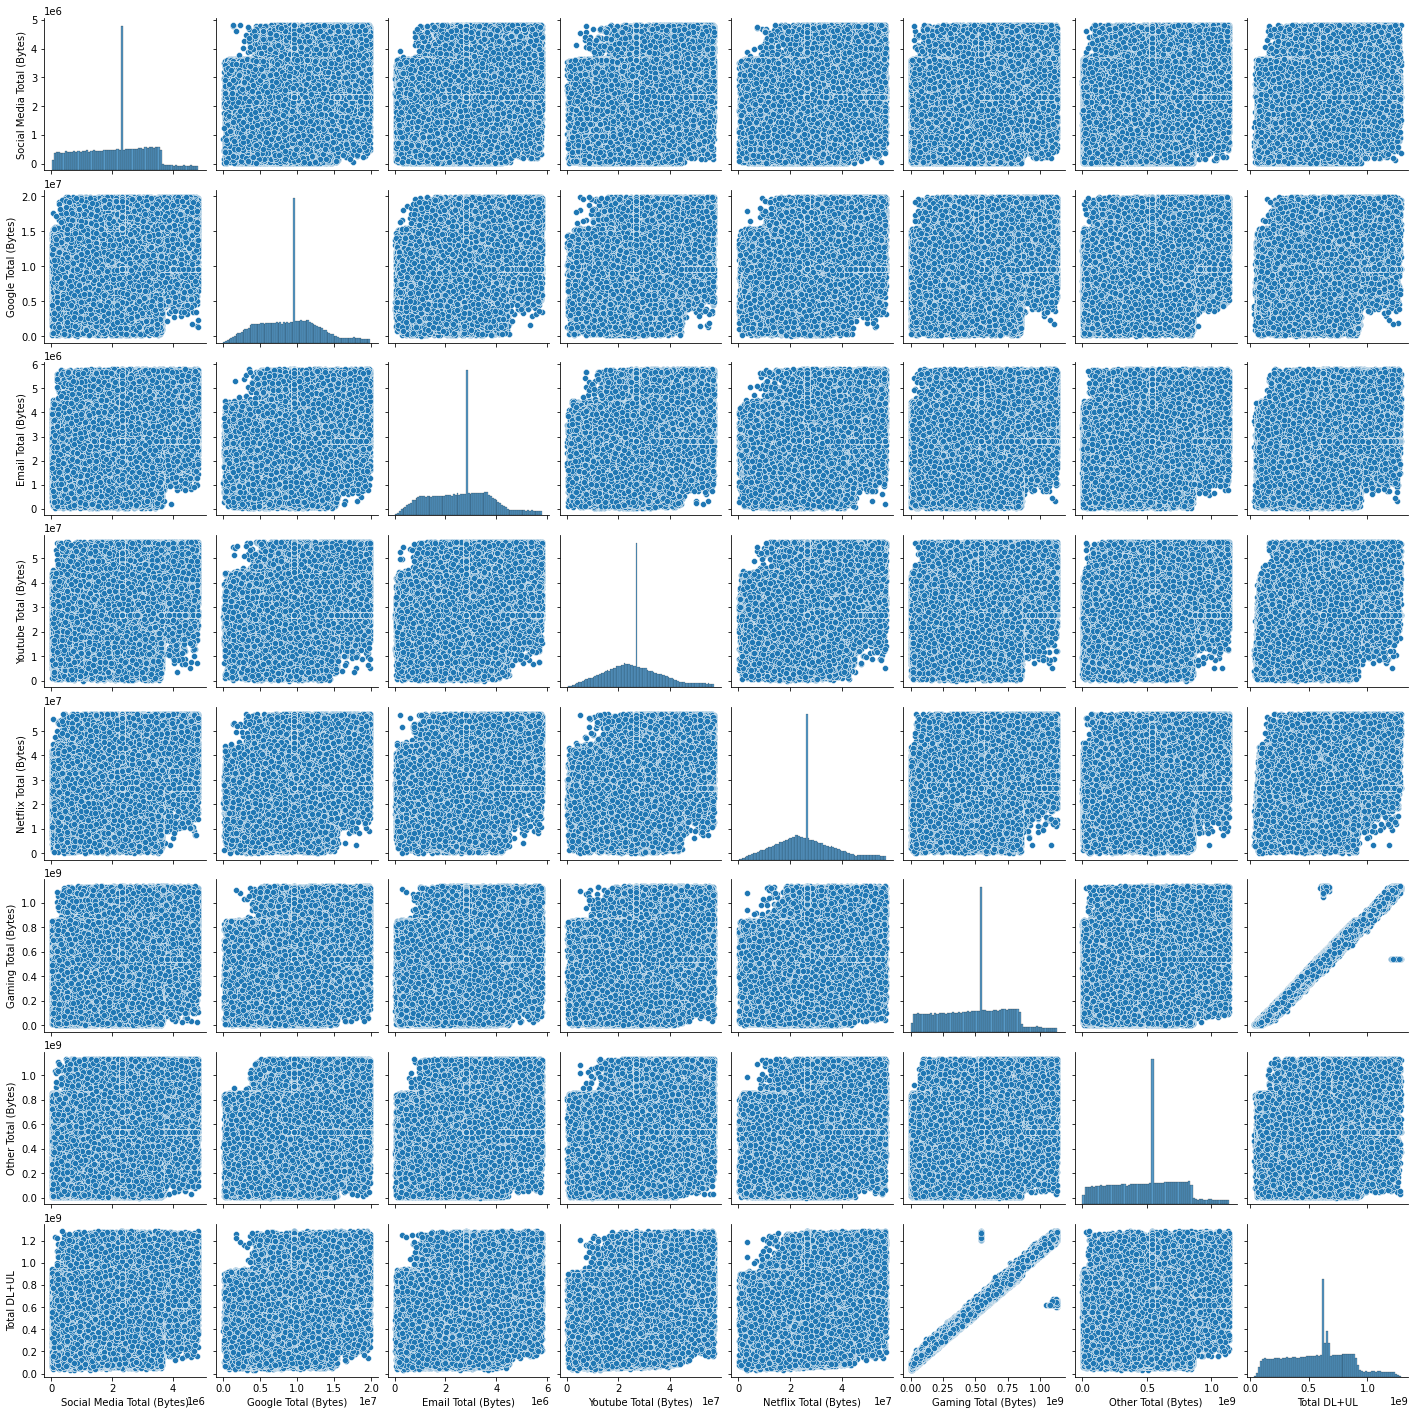

In [49]:
plt.figure()
sns.pairplot(dbbPair)
plt.savefig('pairplot_uoa.png')

There is a linear relationship between Total DL and Gaming.

In [50]:
#define response variable
y = dbb_behav['Total DL+UL']

#define explanatory variable
x = dbb_behav[['Social Media Total (Bytes)',
       'Google Total (Bytes)', 'Email Total (Bytes)', 'Youtube Total (Bytes)',
       'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total DL+UL   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 7.810e+05
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:55:56   Log-Likelihood:            -2.0077e+06
No. Observations:              106472   AIC:                         4.015e+06
Df Residuals:                  106464   BIC:                         4.016e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

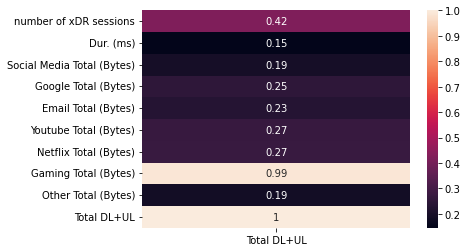

In [51]:
dbb_behav_Corr = dbb_behav.corr()
Corr_total = dbb_behav_Corr[['Total DL+UL']]
sns.heatmap(Corr_total, annot=True)
plt.savefig('apps_vs_total.png')

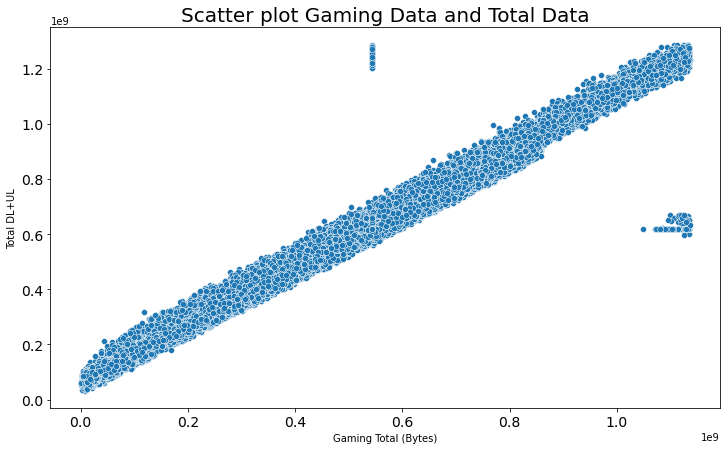

In [52]:
eda.plot_scatter(dbb_behav, 'Gaming Total (Bytes)','Total DL+UL', 'Scatter plot Gaming Data and Total Data', None, None)
plt.savefig('Scatter_Game_Total.png')

### Variable transformations – segmentation of the users into top five decile classes based on the total duration for all sessions and total data (DL+UL) per decile class.

In [53]:
categories = pd.qcut(dbb_behav['Dur. (ms)'], 10)
deciles = categories.values.codes

In [54]:
dbb_behav['decile'] = deciles
dbb_behav

number of xDR sessions  Dur. (ms)  Social Media Total (Bytes)  \
0                         1.00 116,720.00                2,232,135.00   
1                         1.00 181,230.00                2,660,565.00   
2                         1.00 134,969.00                3,195,623.00   
3                         1.00  49,878.00                  280,294.00   
4                         2.00  37,104.00                2,912,542.00   
...                        ...        ...                         ...   
106467                    1.00 140,988.00                  498,569.00   
106468                    1.00 103,137.50                2,305,230.50   
106469                    1.00 103,137.50                  715,224.00   
106470                    1.00 253,030.00                  521,566.00   
106471                    1.00 103,137.50                1,546,088.00   

        Google Total (Bytes)  Email Total (Bytes)  Youtube Total (Bytes)  \
0               4,389,005.00         1,331,362.00          21,624,548.00   
1               5,334,863.00         3,307,781.00          12,432,223.00   
2               3,443,126.00         3,205,380.00          21,333,570.00   
3               9,678,493.00         2,284,670.00           6,977,321.00   
4              18,499,616.00         3,305,469.00          41,533,002.00   
...                      ...                  ...                    ...   
106467          5,429,705.00         2,514,097.00          19,851,572.00   
106468          9,592,666.00         2,801,152.00          26,816,404.50   
106469         10,438,660.00         1,520,771.00          11,959,905.00   
106470          9,830,617.00         3,318,582.00          36,734,940.00   
106471          9,218,647.00         3,330,974.00          40,940,710.00   

        Netflix Total (Bytes)  Gaming Total (Bytes)  Other Total (Bytes)  \
0               27,180,981.00        812,458,661.00       386,570,872.00   
1               11,221,763.00        119,750,078.00       281,710,071.00   
2               19,353,900.00        538,827,713.00       501,693,672.00   
3                1,942,092.00        391,126,127.00        35,279,702.00   
4               49,201,724.00        542,692,459.00       804,804,484.00   
...                       ...                   ...                  ...   
106467           8,531,060.00        437,003,292.00       211,115,113.00   
106468          26,731,202.00        542,692,459.00       540,119,620.00   
106469          26,592,300.00        178,048,738.00       470,526,473.00   
106470          30,905,042.00        510,142,695.00       149,188,439.00   
106471          28,846,230.00         43,070,260.00       401,360,457.00   

          Total DL+UL  decile  
0      878,690,574.00       6  
1      156,859,643.00       8  
2      595,966,483.00       7  
3      422,320,698.00       1  
4      665,014,244.00       1  
...               ...     ...  
106467 480,307,335.00       7  
106468 617,546,860.50       5  
106469 232,123,971.00       5  
106470 596,287,824.00       9  
106471 139,153,646.00       5  

[106472 rows x 11 columns]

In [55]:
Total_per_deciles = dbb_behav.groupby('decile').agg({'Total DL+UL': 'sum'})

In [56]:
Total_per_deciles

Total DL+UL
decile                     
0      5,377,017,858,150.50
1      5,786,658,247,793.50
2      6,016,557,686,193.00
3      5,921,116,252,720.00
4      5,002,023,366,074.00
5      7,409,970,572,941.00
6      5,931,083,722,773.00
7      5,712,473,749,692.50
8      6,763,464,784,618.00
9      7,048,646,519,693.50

In [57]:
Total_per_deciles = Total_per_deciles.sort_values(by=['Total DL+UL'], ascending=False)

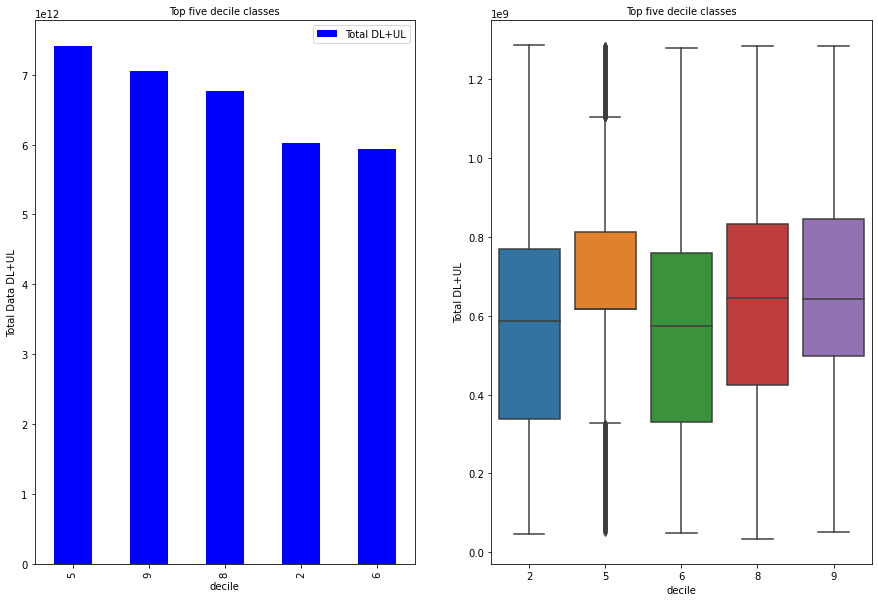

In [58]:
dbb_behav_box = dbb_behav.loc[dbb_behav['decile'].isin([5, 9, 8, 2, 6])]

fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].tick_params(axis='x', labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)
ax[0].set_ylabel('Total Data DL+UL' , fontsize=10)
ax[0].set_title('Top five decile classes', fontsize=10)
Total_per_deciles[:5].plot(ax=ax[0], kind='bar', color='blue')

ax[1].set_title('Top five decile classes', fontsize=10)
sns.boxplot(x='decile', y='Total DL+UL', data=dbb_behav_box)
plt.savefig('top_5_deciles.png')

### Correlation Analysis – correlation matrix for the following variables: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 

In [59]:
dbbcorr = dbb_behav[['Social Media Total (Bytes)',
       'Google Total (Bytes)', 'Email Total (Bytes)', 'Youtube Total (Bytes)',
       'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)']]

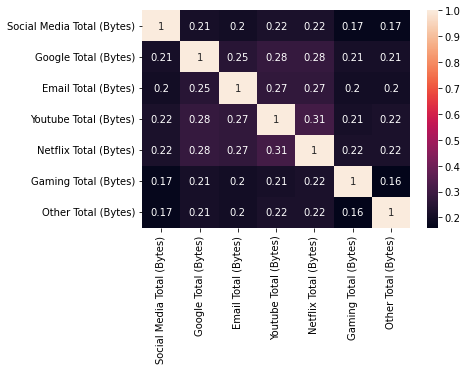

In [60]:
matrix = dbbcorr.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.savefig('application_corr.png')

### Dimensionality Reduction – principal component analysis to reduce the dimensions of the data

In [61]:
dbb_behav.columns

Index(['number of xDR sessions', 'Dur. (ms)', 'Social Media Total (Bytes)',
       'Google Total (Bytes)', 'Email Total (Bytes)', 'Youtube Total (Bytes)',
       'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)',
       'Total DL+UL', 'decile'],
      dtype='object')

In [62]:
dbb_pca = dbb_behav[['Social Media Total (Bytes)',
       'Google Total (Bytes)', 'Email Total (Bytes)', 'Youtube Total (Bytes)',
       'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)', 'decile']]

In [63]:
dbb_pca = dbb_pca.loc[dbb_behav['decile'].isin([5, 9, 8, 2, 6])]
dbb_pca

Social Media Total (Bytes)  Google Total (Bytes)  Email Total (Bytes)  \
0                     2,232,135.00          4,389,005.00         1,331,362.00   
1                     2,660,565.00          5,334,863.00         3,307,781.00   
5                     3,792,912.00         15,263,134.00         2,801,152.00   
6                     2,769,627.00         10,196,403.00         1,358,959.00   
8                     2,305,230.50         14,134,211.00         4,599,825.00   
...                            ...                   ...                  ...   
106465                4,250,312.00         10,246,473.00         5,315,327.00   
106468                2,305,230.50          9,592,666.00         2,801,152.00   
106469                  715,224.00         10,438,660.00         1,520,771.00   
106470                  521,566.00          9,830,617.00         3,318,582.00   
106471                1,546,088.00          9,218,647.00         3,330,974.00   

        Youtube Total (Bytes)  Netflix Total (Bytes)  Gaming Total (Bytes)  \
0               21,624,548.00          27,180,981.00        812,458,661.00   
1               12,432,223.00          11,221,763.00        119,750,078.00   
5               34,347,122.00          30,315,501.00        511,635,787.00   
6               26,431,335.00          45,812,397.00        548,461,057.00   
8               26,816,404.50          54,216,117.00        833,087,952.00   
...                       ...                    ...                   ...   
106465          38,012,812.00          51,950,311.00        972,344,996.00   
106468          26,816,404.50          26,731,202.00        542,692,459.00   
106469          11,959,905.00          26,592,300.00        178,048,738.00   
106470          36,734,940.00          30,905,042.00        510,142,695.00   
106471          40,940,710.00          28,846,230.00         43,070,260.00   

        Other Total (Bytes)  decile  
0            386,570,872.00       6  
1            281,710,071.00       8  
5            492,372,777.00       9  
6            224,888,713.00       6  
8          1,041,882,992.00       5  
...                     ...     ...  
106465     1,075,140,407.00       9  
106468       540,119,620.00       5  
106469       470,526,473.00       5  
106470       149,188,439.00       9  
106471       401,360,457.00       5  

[53239 rows x 8 columns]

In [64]:
decile_names = {
    2:'decile 2',
    5:'decile 5', 
    6:'decile 6',
    8:'decile 8',
    9:'decile 9'
}
dbb_pca['decile_names'] = dbb_pca['decile'].map(decile_names)

In [65]:
X = dbb_pca.drop(['decile', 'decile_names'], axis=1)
y = dbb_pca['decile']

### Data preprocessing - Scaling

In [66]:
x_scaled = StandardScaler().fit_transform(X)

### Dimension reduction PCA

In [67]:
pca = PCA(n_components=2)

pca_features = pca.fit_transform(x_scaled)

print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

Shape before PCA:  (53239, 7)
Shape after PCA:  (53239, 2)


In [68]:
decile_names = {
    2:'decile 2',
    5:'decile 5', 
    6:'decile 6',
    8:'decile 8',
    9:'decile 9'
}

pca_df['decile'] = list(y)
pca_df['decile'] = pca_df['decile'].map(decile_names)

pca_df

PC1   PC2    decile
0     -1.14  1.05  decile 6
1     -2.21 -0.36  decile 8
2      1.13  0.07  decile 9
3     -0.15  0.89  decile 6
4      2.82 -0.54  decile 5
...     ...   ...       ...
53234  3.82 -0.32  decile 9
53235 -0.15 -0.00  decile 5
53236 -2.06 -0.74  decile 5
53237 -0.58  1.05  decile 9
53238 -0.52 -0.89  decile 5

[53239 rows x 3 columns]

In [69]:
pca.explained_variance_

array([2.61996789, 0.79691833])

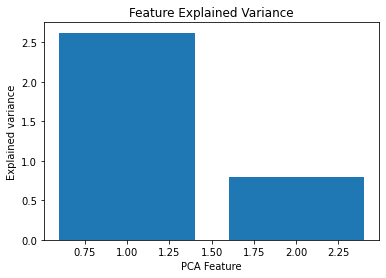

In [70]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.savefig('pca_explained_variance.png')

In [71]:
#Principal components correlation coefficients
loadings = pca.components_

# Number of features before PCA
n_features = pca.n_features_

# Feature names before PCA
feature_names = ['Social Media Total (Bytes)', 'Google Total (Bytes)',
       'Email Total (Bytes)', 'Youtube Total (Bytes)', 'Netflix Total (Bytes)',
       'Gaming Total (Bytes)', 'Other Total (Bytes)']

# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]

# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))

# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

PC1   PC2
feature_names                        
Social Media Total (Bytes) 0.35 -0.01
Google Total (Bytes)       0.40  0.03
Email Total (Bytes)        0.39  0.04
Youtube Total (Bytes)      0.41 -0.02
Netflix Total (Bytes)      0.41  0.02
Gaming Total (Bytes)       0.34  0.67
Other Total (Bytes)        0.34 -0.74

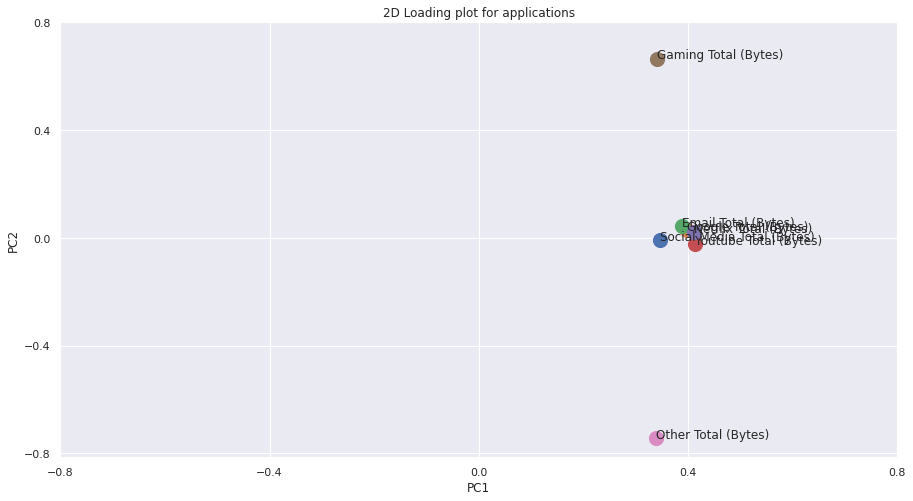

In [72]:
sns.set()
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]


plt.figure(figsize=(15,8))
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)

# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Loading plot for applications')
plt.savefig('pca_applications.png')

In [73]:
pca_df_scaled = pca_df.copy()

scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

pca_df_scaled

PC1   PC2    decile
0     -0.12  0.18  decile 6
1     -0.23 -0.06  decile 8
2      0.12  0.01  decile 9
3     -0.02  0.16  decile 6
4      0.30 -0.10  decile 5
...     ...   ...       ...
53234  0.40 -0.06  decile 9
53235 -0.02 -0.00  decile 5
53236 -0.22 -0.13  decile 5
53237 -0.06  0.18  decile 9
53238 -0.06 -0.16  decile 5

[53239 rows x 3 columns]

<Figure size 1440x1080 with 0 Axes>

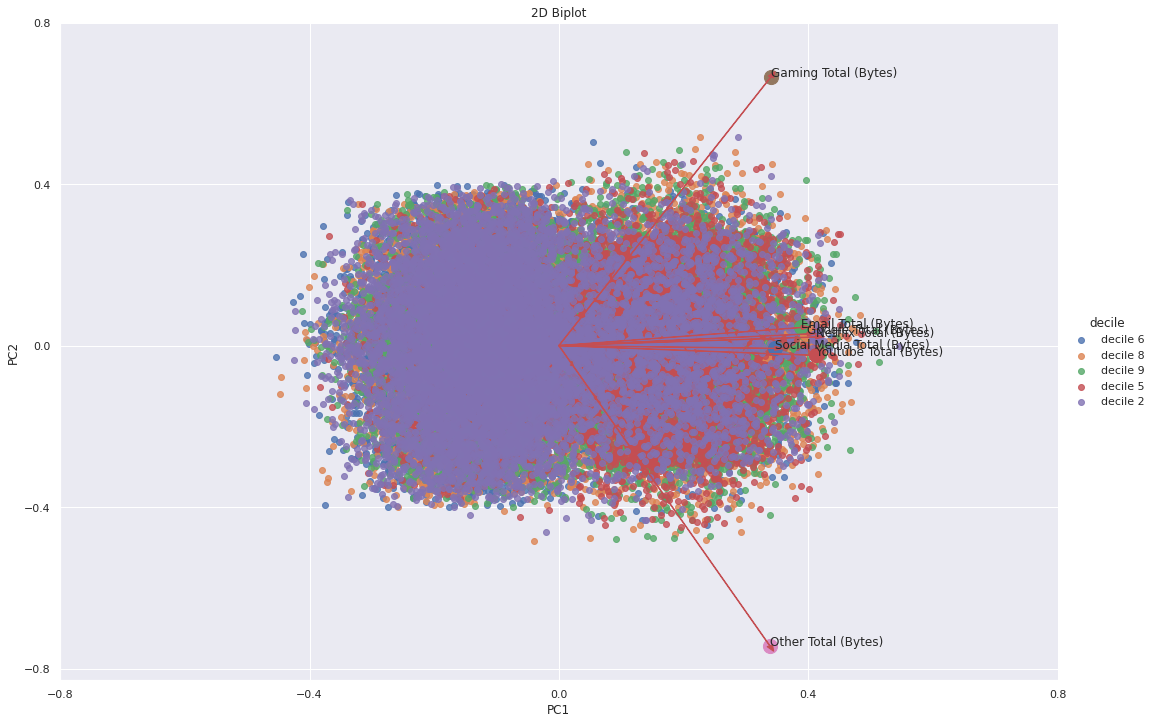

In [74]:
xs = loadings[0]
ys = loadings[1]

plt.figure(figsize=(20,15))
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_scaled, 
    fit_reg=False, 
    hue='decile',  
    legend=True, height=10, aspect=1.5
    )

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.title('2D Biplot')
plt.savefig('pca_biplot.png')

## Looking at number of sessions outliers

In [75]:
outlier_dict['number of xDR sessions_outlier'].describe()

number of xDR sessions     Dur. (ms)   Total DL (Bytes)  \
count                  156.00        156.00             156.00   
mean                    11.54  2,703,019.87   5,264,579,910.24   
std                     39.74  3,393,475.18  18,381,528,140.62   
min                      7.00    170,680.00   1,699,776,303.00   
25%                      7.00  1,440,538.50   2,984,518,647.50   
50%                      8.00  1,936,112.50   3,533,903,792.50   
75%                      9.00  2,929,109.00   4,364,111,037.25   
max                    504.00 35,399,200.00 232,876,890,010.00   

       Total UL (Bytes)  Social Media Total (Bytes)  Google Total (Bytes)  \
count            156.00                      156.00                156.00   
mean     477,592,278.24               21,213,998.69         90,712,623.76   
std    1,670,414,230.23               73,606,134.70        309,567,139.20   
min      216,741,783.00                4,511,550.00         36,433,473.00   
25%      290,587,784.75               12,528,900.75         53,084,985.50   
50%      318,767,777.00               14,683,665.00         61,960,981.00   
75%      371,374,490.50               17,210,220.50         73,843,377.75   
max   21,175,512,458.00              932,422,807.00      3,925,359,354.00   

       Email Total (Bytes)  Youtube Total (Bytes)  Netflix Total (Bytes)  \
count               156.00                 156.00                 156.00   
mean         26,287,306.54         262,526,536.33         261,516,296.99   
std          88,066,014.82         903,011,145.98         893,626,117.87   
min           9,240,130.00         100,439,217.00         101,876,325.00   
25%          15,580,389.75         154,559,455.00         157,403,832.25   
50%          18,306,291.50         178,148,078.50         181,277,964.50   
75%          21,451,334.00         212,611,094.25         205,487,530.25   
max       1,116,800,390.00      11,447,654,394.00      11,332,644,210.00   

       Gaming Total (Bytes)  Other Total (Bytes)  
count                156.00               156.00  
mean       4,983,852,842.06     4,837,256,736.37  
std       17,451,667,860.21    16,969,986,127.65  
min        1,551,436,575.00     1,351,860,232.00  
25%        2,779,706,092.50     2,819,488,982.25  
50%        3,349,264,927.50     3,278,797,485.00  
75%        4,086,070,742.00     4,111,751,483.50  
max      221,065,748,503.00   215,011,972,057.00